# 1st project on Data science and ML on Titanic data set 

In [2]:
#Import Necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, recall_score, roc_auc_score, precision_score, f1_score

# 1st Task performin EDA


In [3]:
# importing the data 
df = pd.read_csv(r"C:\Users\sonam\Downloads\titanic-dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe() #to get statical overview of the data 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


These are key insights of describe 
1. Survival Rate: About 38.4% of passengers survived (mean value of Survived is 0.38).
2. Passenger Class: Most passengers were in 2nd and 3rd class (mean Pclass is 2.31).
3. Age Distribution: The average age of passengers is around 29.7 years, with the youngest being 0.42 years and the oldest 80 years.
4. Family Size: The number of siblings/spouses (SibSp) and parents/children (Parch) per passenger varies, with the average passenger having 5. around 0.5 siblings/spouses and 0.38 parents/children.
6. Fare: The mean fare paid was about $32.20, with a significant range from $0 to $512.33, suggesting some passengers paid much more than others.


The dataset shows diverse values in passenger demographics, survival, and fare distribution.

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In this data set 5 class are of intrger type ,5 are catagorical and rest are float .

value_counts() calculates the count of each unique ticket value, returning a Series where the index represents unique ticket numbers and the values show how many times each ticket number appears.


In [6]:
print(df['Ticket'].value_counts()) #analysing ticket frequency 


Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64


# What This Output Tells Us
1. Shared Tickets: A ticket number appearing multiple times suggests that these passengers likely booked together, possibly as a family or a group. For instance, if "CA. 2343" appears 7 times, it’s likely that these 7 passengers were traveling as a family or a group sharing this ticket.

2. Single Occurrences: Ticket numbers with a count of 1 are unique, indicating that these passengers were likely traveling alone, or at least they didn’t share their ticket with anyone else in this dataset

In [7]:
#Check For Null Values
print(df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Here in columns age and cabin there are null values whic are 177 and 687 respectively

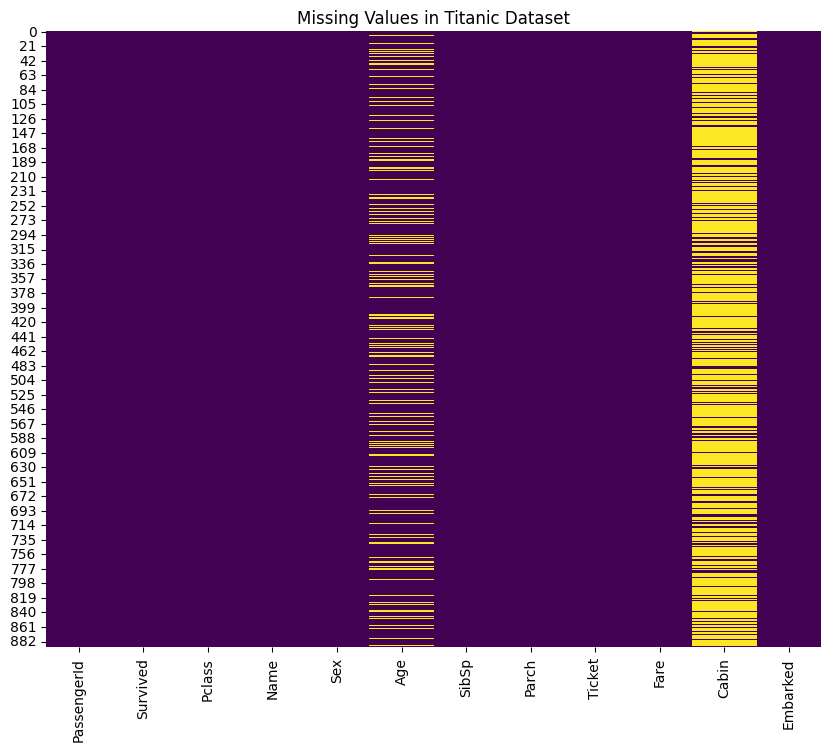

In [8]:
# ploting missing value in data set 
plt.figure(figsize=(10, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Titanic Dataset')
plt.show()

The figure also shows there are null values in age and cabin.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Histogram for numerical data 

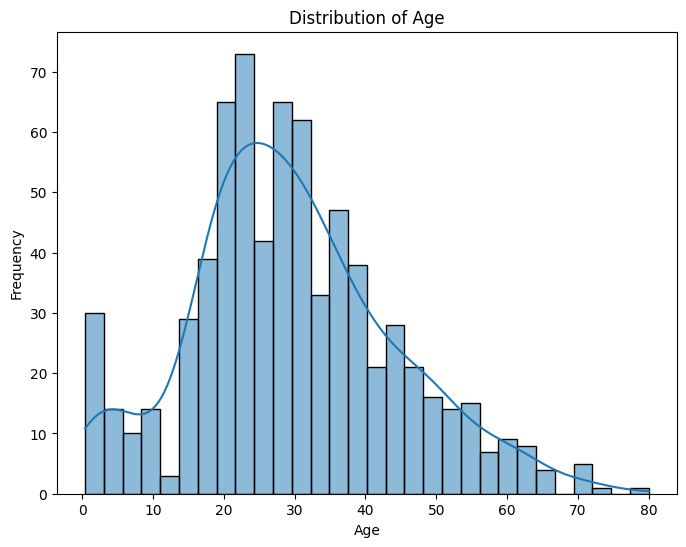

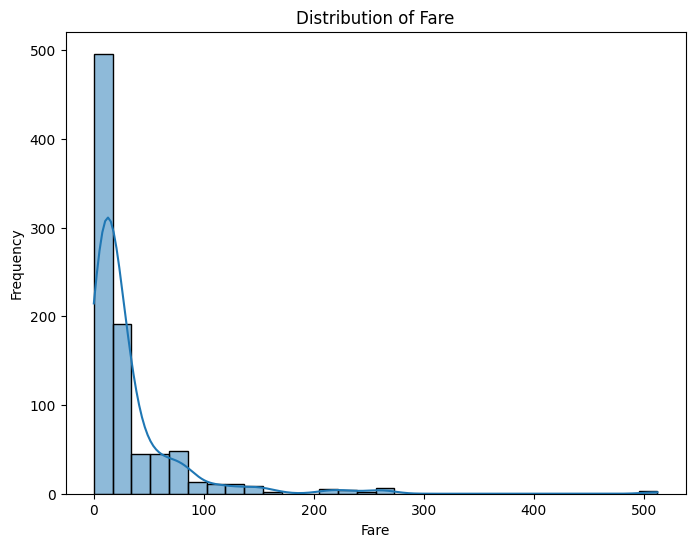

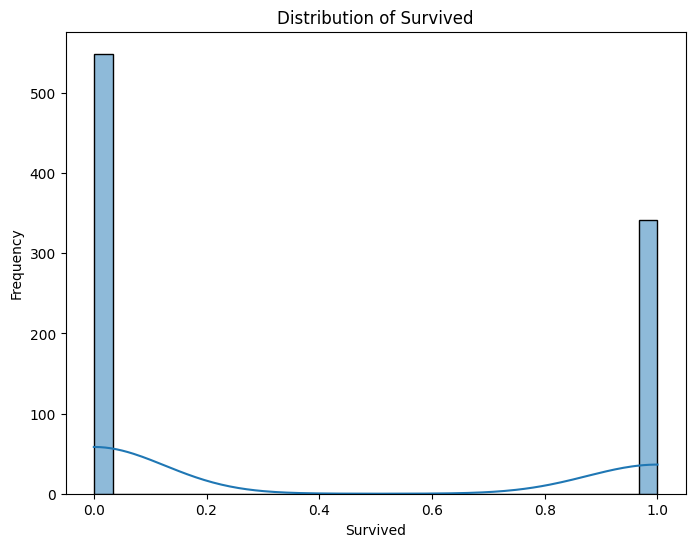

In [10]:
#plotting histogram for numerical data to understand them in better way, 
#Histogram for Age
plt.figure(figsize=(8,6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
#Histogram for Fare
plt.figure(figsize=(8,6))
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()
#histogram for survived 
plt.figure(figsize=(8,6))
sns.histplot(df['Survived'], bins=30, kde=True)
plt.title('Distribution of Survived')
plt.xlabel('Survived')
plt.ylabel('Frequency')
plt.show()




Intrepretation of graphs 
1. Distribution of age shows there is more adults of age between (20-40) and least is of senior citizen and children . still children are more than senior citizen .
2. distribution of fare shows , there were more people on boat with least fare and less people with higher fare . 
3. distribution of survived describes that , compratively less people survived .

# Bar Plot for finding relation of  categorical data with numerical data 

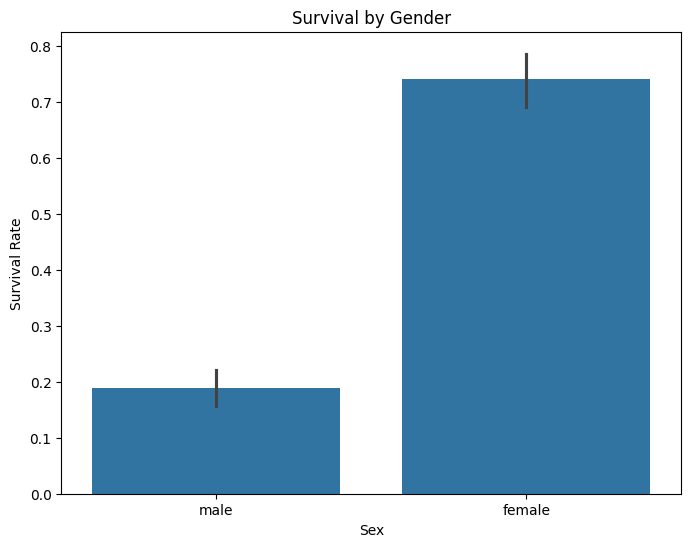

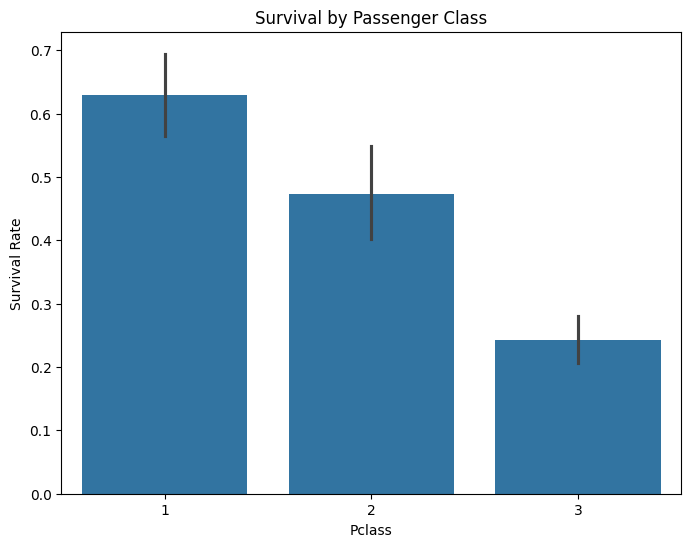

In [11]:
# Bar Plot for survival by Gender
plt.figure(figsize=(8,6))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival by Gender')
plt.ylabel('Survival Rate')
plt.show()

#Bar Plot for survival by Class
plt.figure(figsize=(8,6))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

# Output
This bar plot shows that the survival rate of Female is quite greater than of Male, and first class people have more survival rate than second class people while second class people has more survival rate than third class people. 

# Pair Plots to study relationships between Features 

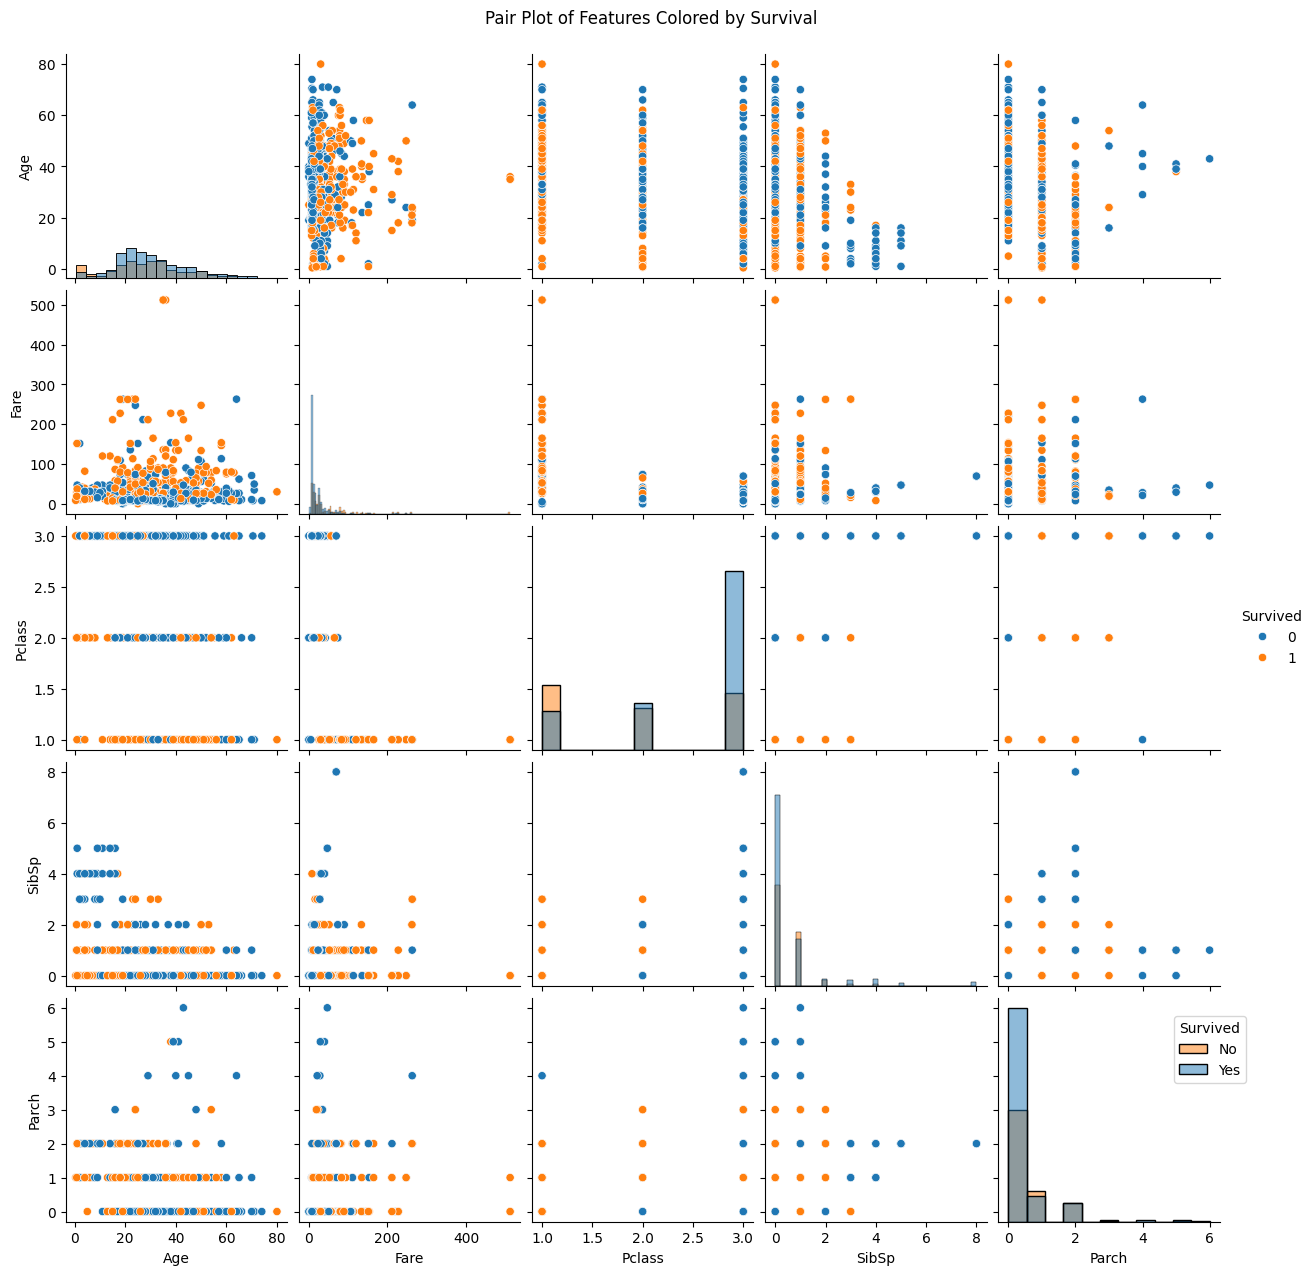

In [12]:
#Selection relevant columns for the pair plot
pairplot_data = df[['Survived', 'Age', 'Fare', 'Pclass', 'SibSp', 'Parch']]
sns.pairplot(pairplot_data, hue='Survived', diag_kind='hist')
plt.suptitle('Pair Plot of Features Colored by Survival', y=1.02)
plt.legend(title='Survived', labels=['No', 'Yes'], loc='upper right', bbox_to_anchor=(1.15, 0.95))
plt.show()

# Output analyzing
From the above graph of pair plot following pattrens can be studied 
1. Passenger Class (Pclass) and Survival:
- Passengers in 1st class (Pclass=1) had a higher survival rate (more blue points).
- 3rd class (Pclass=3) had a lower survival rate (more orange points).

2. Fare and Survival:

- Higher fares are associated with a higher survival rate.
- Many survivors (blue points) paid higher fares, often corresponding to 1st class.

3. Age and Survival:

- Younger passengers have more survivors, especially children and young adults.
- Older passengers (ages 50+) had fewer survivors, although some older passengers in 1st class survived.

4. Family Size (SibSp and Parch) and Survival:

- SibSp (Siblings/Spouses Aboard): Passengers with 1–2 siblings/spouses had a moderate survival rate. Passengers with very large numbers (4+) of siblings/spouses had low survival rates.
- Parch (Parents/Children Aboard): Passengers with 1–3 parents/children aboard had a slightly better survival rate than those alone or with large family sizes.

5. Combined Effect of Class and Fare:

- 1st class passengers, who typically paid higher fares, had a significantly higher chance of survival.
- This indicates that social class and economic status were major factors in survival.

# 2nd task Feature Engineering

In [13]:
# Creating Age groups 
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 60, 100], labels=['Child', 'Teenager', 'Adult', 'Senior'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult


In [14]:
#Creating Family Size Features 
df['FamilySize'] = df['SibSp'] + df['Parch']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,0


In [15]:
#Extracting title from name 
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,0,Mr


# why extracting title is important or useful
By extracting "Title" from the "Name" column, this feature engineering step helps the model capture patterns related to gender, age, and social status, which are valuable predictors of survival in the Titanic dataset.

1. Social Status & Gender: Titles like "Mr", "Mrs", "Miss", and "Master" indicate gender, age, and sometimes social status (e.g., "Lady", "Sir"), which may correlate with survival due to evacuation priorities.

2. Model Accuracy: Titles capture nuanced survival patterns across gender and age groups, improving model accuracy (e.g., "Master" for boys may indicate higher survival).

3. Handling Missing Data: Titles can help infer missing values, such as estimating age if a passenger’s title suggests they are young (e.g., "Master").

4. Granular Information: Titles add detail beyond "Gender" or "Age", helping the model distinguish passenger types within the same gender (e.g., "Mrs" vs. "Miss").








# Handling missing data 


In [16]:
print(df['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']


In [17]:
# Group by the 'Title' column and calculate the mean age for each title
title_age_mean = df.groupby('Title')['Age'].mean()

# Display the mean age for each title
print(title_age_mean)


Title
Capt            70.000000
Col             58.000000
Don             40.000000
Dr              42.000000
Jonkheer        38.000000
Lady            48.000000
Major           48.500000
Master           4.574167
Miss            21.773973
Mlle            24.000000
Mme             24.000000
Mr              32.368090
Mrs             35.898148
Ms              28.000000
Rev             43.166667
Sir             49.000000
the Countess    33.000000
Name: Age, dtype: float64


In [18]:
# Define a function to fill missing age values based on the title
def impute_age(row):
    if pd.isnull(row['Age']):
        return title_age_mean[row['Title']]
    else:
        return row['Age']

# Apply the function to the 'Age' column
df['Age'] = df.apply(impute_age, axis=1)




In [19]:
# Verify if there are any missing values left in the 'Age' column
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
AgeGroup       177
FamilySize       0
Title            0
dtype: int64


# Remove Cabin and Name Column
Since cabin data has a lot of null values, and Name, Ticket and passengerId doesn't necessary for our analytics and all are different object value so we can remove it from our dataset

In [20]:
df = df.drop(labels=['Cabin', 'Name', 'PassengerId', 'Ticket'], axis=1)

# Create replace function to replace object values with int types


In [21]:
def map_to_replace(columns):
    for col in columns:
        if(df[col].dtype == 'object' or df[col].dtype == 'category'):
            i = 0
            mapValue = {}
            for unique in df[col].unique():
                mapValue[unique] = i
                i+=1
            df[col] = df[col].map(mapValue)
            

map_to_replace(np.array(['Sex', 'Embarked', 'AgeGroup', 'Title']))
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,FamilySize,Title
0,0,3,0,22.0,1,0,7.2500,0,0,1,0
1,1,1,1,38.0,1,0,71.2833,1,0,1,1
2,1,3,1,26.0,0,0,7.9250,0,0,0,2
3,1,1,1,35.0,1,0,53.1000,0,0,1,1
4,0,3,0,35.0,0,0,8.0500,0,0,0,0


# Create a heatmap of correlation of data using seaborn

In [ ]:
df.corr()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,FamilySize,Title
Survived,1.000000,-0.338481,0.543351,-0.089135,-0.035322,0.081629,0.257307,0.118026,0.014515,0.016639,0.290260
Pclass,-0.338481,1.000000,-0.131900,-0.343567,0.083081,0.018443,-0.549500,0.028566,0.089176,0.065997,-0.191152
Sex,0.543351,-0.131900,1.000000,-0.117351,0.114631,0.245489,0.182333,0.128526,0.046200,0.200988,0.361165
Age,-0.089135,-0.343567,-0.117351,1.000000,-0.267660,-0.196802,0.091095,-0.000625,-0.236630,-0.281255,-0.107098
SibSp,-0.035322,0.083081,0.114631,-0.267660,1.000000,0.414838,0.159651,-0.063794,0.178949,0.890712,0.148118
Parch,0.081629,0.018443,0.245489,-0.196802,0.414838,1.000000,0.216225,-0.082144,0.150345,0.783111,0.137145
Fare,0.257307,-0.549500,0.182333,0.091095,0.159651,0.216225,1.000000,0.071010,-0.016988,0.217138,0.108309
Embarked,0.118026,0.028566,0.128526,-0.000625,-0.063794,-0.082144,0.071010,1.000000,0.102993,-0.084639,0.089482
AgeGroup,0.014515,0.089176,0.046200,-0.236630,0.178949,0.150345,-0.016988,0.102993,1.000000,0.197416,0.088020
FamilySize,0.016639,0.065997,0.200988,-0.281255,0.890712,0.783111,0.217138,-0.084639,0.197416,1.000000,0.169749


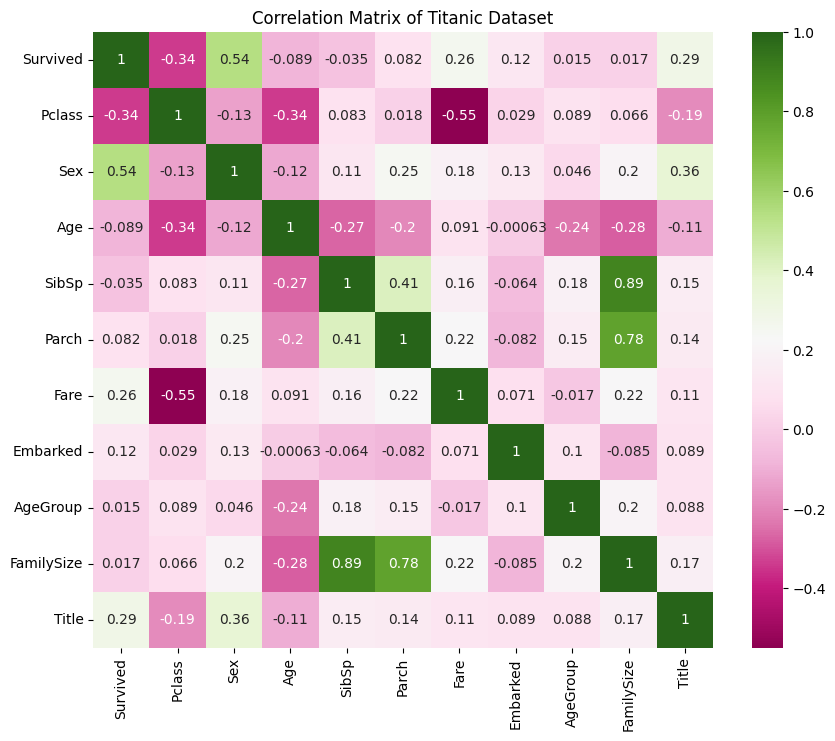

In [51]:
#plloting the heatmap 
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='PiYG')
plt.title('Correlation Matrix of Titanic Dataset')
plt.show()

From above heatmap we can see that class survived has highest positive correlation relation with sex, title and,then fare.Similarly it has moderate negative corrrelation  with pclass. 

# Feature Engineering 
 Feature engineering is the process of preparing and transforming raw data into meaningful features that make machine learning models work better.It involves Transforming the features, Creating new features.The goal is to help the model understand patterns in the data more effectively.

 

In [24]:
#lets first drop those class which has high correlation with other class since keeping both class is irrevelant . for example dropping SibSp and parch class since it is highly correlated with family size 
titanic_data = df.drop(['SibSp', 'Parch'], axis=1)


In [25]:
#pclass and fare both indicates wealth and and are correlated with survived class so lets create a modified class called classfare to reduce dimentionality 
titanic_data['ClassFare'] = titanic_data['Pclass'] * titanic_data['Fare']


In [26]:
print(titanic_data[['Pclass', 'Fare', 'ClassFare']].head())

   Pclass     Fare  ClassFare
0       3   7.2500    21.7500
1       1  71.2833    71.2833
2       3   7.9250    23.7750
3       1  53.1000    53.1000
4       3   8.0500    24.1500


In [27]:
correlation = titanic_data['ClassFare'].corr(titanic_data['Survived'])
print(f"Correlation between ClassFare and Survived: {correlation}")

Correlation between ClassFare and Survived: 0.18362691096549183


In [28]:
titanic_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,AgeGroup,FamilySize,Title,ClassFare
0,0,3,0,22.0,7.2500,0,0,1,0,21.7500
1,1,1,1,38.0,71.2833,1,0,1,1,71.2833
2,1,3,1,26.0,7.9250,0,0,0,2,23.7750
3,1,1,1,35.0,53.1000,0,0,1,1,53.1000
4,0,3,0,35.0,8.0500,0,0,0,0,24.1500


In [29]:
# Remove the Pclass and Fare columns
titanic_data.drop(['Pclass', 'Fare'], axis=1, inplace=True)

In [30]:
titanic_data.head()

,Survived,Sex,Age,Embarked,AgeGroup,FamilySize,Title,ClassFare
0,0,0,22.0,0,0,1,0,21.7500
1,1,1,38.0,1,0,1,1,71.2833
2,1,1,26.0,0,0,0,2,23.7750
3,1,1,35.0,0,0,1,1,53.1000
4,0,0,35.0,0,0,0,0,24.1500


In [31]:
#catagorising age in differnt age groups for beter understanging and manupulation according to age , since children and old people are given more priority to services and their changes to survive is more 
titanic_data['AgeGroup'] = pd.cut(titanic_data['Age'], bins=[0, 12, 18, 60, 100], labels=['Child', 'Teenager', 'Adult', 'Senior'])
titanic_data['AgeGroup'].value_counts()



AgeGroup
Adult       726
Child        73
Teenager     70
Senior       22
Name: count, dtype: int64

Mjority are adults and senior are least 

In [32]:
agegroup_mapping = {'Child': 0, 'Teenager': 1, 'Adult': 2, 'Senior': 3}
titanic_data['AgeGroup'] = titanic_data['AgeGroup'].map(agegroup_mapping)



In [33]:
correlation = titanic_data['AgeGroup'].corr(titanic_data['Survived'])
print(f"Correlation between Agegroup and Survived: {correlation}")

Correlation between Agegroup and Survived: -0.12868947571588846


previously corelation of survived with age was -0.089 and now for age group it is -0.1286 which is higher than previous and suggest huss lower age group suggest higher survivel chance 

In [34]:
# Convert AgeGroup to numeric 
titanic_data['AgeGroup'] = titanic_data['AgeGroup'].astype(int) #since pd.cut function treats bins as categorical data .




In [35]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Sex         891 non-null    int64  
 2   Age         891 non-null    float64
 3   Embarked    891 non-null    int64  
 4   AgeGroup    891 non-null    int32  
 5   FamilySize  891 non-null    int64  
 6   Title       891 non-null    int64  
 7   ClassFare   891 non-null    float64
dtypes: float64(2), int32(1), int64(5)
memory usage: 52.3 KB


In [36]:
correlation = titanic_data['Sex'].corr(titanic_data['Survived'])
print(f"Correlation between Sex and Survived: {correlation}")

Correlation between Sex and Survived: 0.5433513806577551


Now we have all data in numeric format , Now its ready for machine learning 

# Feature importance and feature Selection with random forest classifier 

In [37]:
# Random forest classifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)




RandomForestClassifier(random_state=42)

In [38]:
y_pred = model.predict(X_test)

C:\Users\sonam\AppData\Local\Temp\ipykernel_7596\2409071197.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')


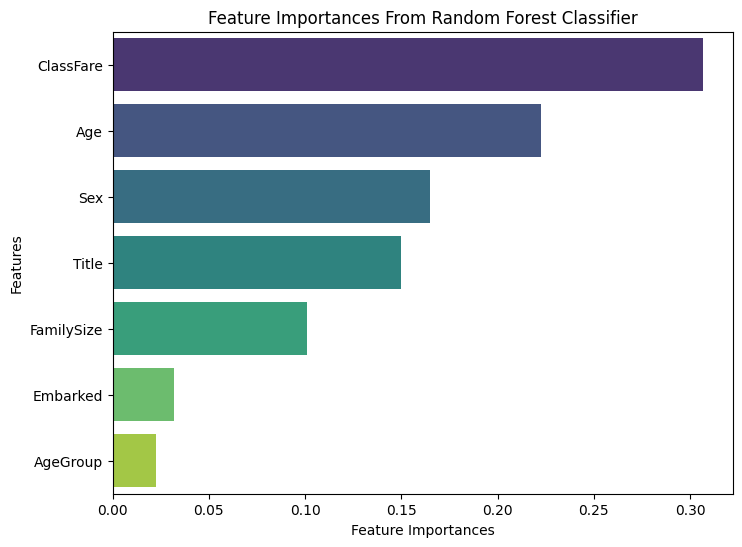

In [39]:
#plotting feature importance with randomforest classifier 
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
plt.title('Feature Importances From Random Forest Classifier')
plt.xlabel('Feature Importances')
plt.ylabel('Features')
plt.show()

Here top contributer is classfare and least contributer is Age group 

In [40]:
#printing feature importance 
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False, inplace=True)
print(feature_importances)

ClassFare     0.306730
Age           0.222747
Sex           0.164877
Title         0.149947
FamilySize    0.101139
Embarked      0.031999
AgeGroup      0.022562
dtype: float64


In [41]:
#accuracy with all features selected 
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 82.12%


# Roc And Auc Curve For Random Forest

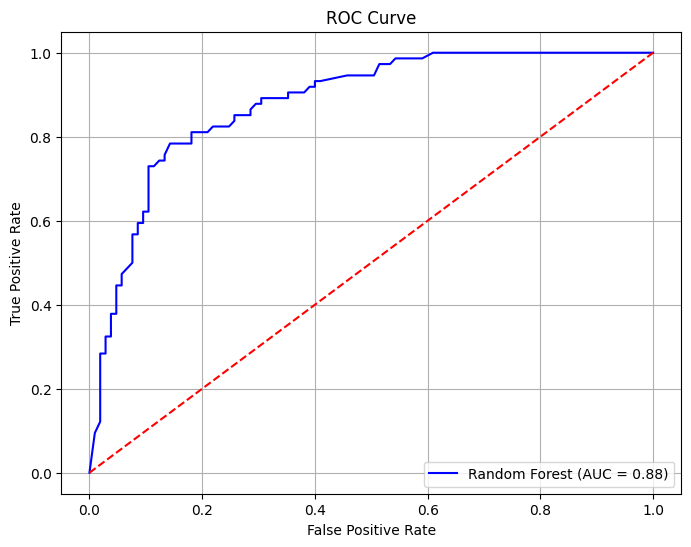

In [42]:

from sklearn.metrics import roc_curve, roc_auc_score


y_pred_proba_rf = model.predict_proba(X_test)[:, 1]  # Getting probabilities of the positive class (class 1)


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rf)

# Calculate the AUC (Area Under the Curve) score
roc_auc = roc_auc_score(y_test, y_pred_proba_rf)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label="Random Forest (AUC = {:.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


here 
True Positive Rate (TPR) vs. False Positive Rate (FPR):

The x-axis represents the False Positive Rate (FPR): the proportion of negative instances incorrectly classified as positive.
The y-axis represents the True Positive Rate (TPR): the proportion of positive instances correctly identified.
The curve plots TPR against FPR at various threshold levels for the classifier.
AUC (Area Under the Curve):

The AUC value for this classifier is 0.88, which is a good indicator of performance.
AUC values range from 0.5 (random guessing) to 1.0 (perfect classifier). A value of 0.91 indicates the model performs very well in distinguishing between classes.
Model Performance:

The curve stays close to the top-left corner, which signifies a high TPR and a low FPR. This means the classifier is good at correctly identifying positive cases while minimizing false positives

In [43]:
# lets remvove low feature importance from data set 
titanic_data = titanic_data.drop(labels=[ 'AgeGroup', 'Embarked'], axis=1)

In [44]:
#accuracy after slecting slected features 
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print("Accuracy on Test Data:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy on Test Data: 0.7988826815642458

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



The accuracy is slightly reduced to 0.79 

we can perform more better using techniques like Grid Search CV 

# Ltes perform Grid Search cv for hyperparameter tunning 

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],        # Number of trees
    'max_depth': [None, 10, 20, 30],        # Maximum depth of trees
    'min_samples_split': [2, 5, 10],        # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],          # Minimum number of samples required at each leaf node
   }

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with cross-validation (cv=5)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV to the training data (X_train and y_train)
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best parameters found by GridSearchCV:", grid_search.best_params_)

# Best model from GridSearchCV
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on the test set
best_rf_pred = best_rf_model.predict(X_test)
best_rf_accuracy = accuracy_score(y_test, best_rf_pred)
print(f"Accuracy of the best model: {best_rf_accuracy * 100:.2f}%")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found by GridSearchCV: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Accuracy of the best model: 83.24%




Here is the  Summary of Grid search Cv results 

Objective:
The goal was to tune the hyperparameters of a Random Forest model to optimize its performance using GridSearchCV with cross-validation (5 folds).

Hyperparameters Tuned:

max_depth: The maximum depth of the trees in the Random Forest.
min_samples_leaf: The minimum number of samples required to be at a leaf node.
min_samples_split: The minimum number of samples required to split an internal node.
n_estimators: The number of trees in the forest.
Total Number of Candidates Tested:

108 candidates, created by evaluating all combinations of the tuned hyperparameters.
Best Hyperparameters Found:

max_depth: 10
min_samples_leaf: 2
min_samples_split: 5
n_estimators: 50
These settings provided the optimal balance between model complexity and performance.

Best Model Accuracy:

The accuracy of the best model with the selected hyperparameters was 83.24%

In [49]:
#now training the model with best parameters given by grid search cv 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rfc = RandomForestClassifier(max_depth=10,min_samples_split=5,n_estimators=50, random_state=2)
rfc.fit(X_train, y_train)
y_predf = rfc.predict(X_test)

# Model evaluation 

In [50]:
accuracy = accuracy_score(y_test, y_predf)
precision = precision_score(y_test, y_predf)
recall = recall_score(y_test, y_predf)
f1 = f1_score(y_test, y_predf)

y_proba = rfc.predict_proba(X_test)[:, 1] if hasattr(rfc, "predict_proba") else None
if y_proba is not None:
    auc = roc_auc_score(y_test, y_proba)
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
if y_proba is not None:
    print(f"AUC Score: {auc:.2f}")

Accuracy: 0.82
Precision: 0.83
Recall: 0.72
F1-Score: 0.77
AUC Score: 0.89


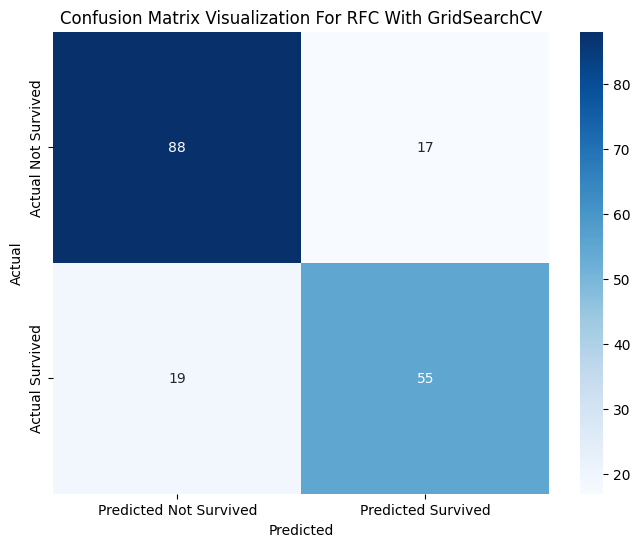

In [48]:
# plotting confusion matrix 
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Not Survived', 'Predicted Survived'], yticklabels=['Actual Not Survived', 'Actual Survived'])
plt.title("Confusion Matrix Visualization For RFC With GridSearchCV")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()